<a href="https://colab.research.google.com/github/DavyL0/Data-Analize-Bank/blob/main/Mod_07_Tarefa_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [ ]:
!pip install -U scikit-learn
!pip install -U imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 22.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [ ]:
df = pd.read_csv('df_dataframes.csv')
df.head()

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,tipo_renda_Pensioner,tipo_renda_State servant,tipo_renda_Student,tipo_renda_Working,estado_civil_Married,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,False,False,False,False,True,True,False
1,1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,False,False,False,False,False
2,2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,False,False,False,False,False
3,3,0,46.224658,2.106849,1,1,1,1,2.0,False,False,False,False,True,True,False
4,4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,False,False,True,True,False


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
qtd_filhos,int64
idade,float64
tempo_emprego,float64
possui_celular,int64
possui_fone_comercial,int64
possui_fone,int64
possui_email,int64
qt_pessoas_residencia,float64
mau,bool


In [ ]:
df.mau = df.mau.map({True: 1, False: 0})
df.mau = df.mau.astype(int)  # Fill NaN values with 0 before converting to integer

In [ ]:
y = df['mau']
X = df.drop(columns='mau', axis =1)

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=100)

In [ ]:
clf_dt.fit(X, y)

DecisionTreeClassifier(random_state=100)

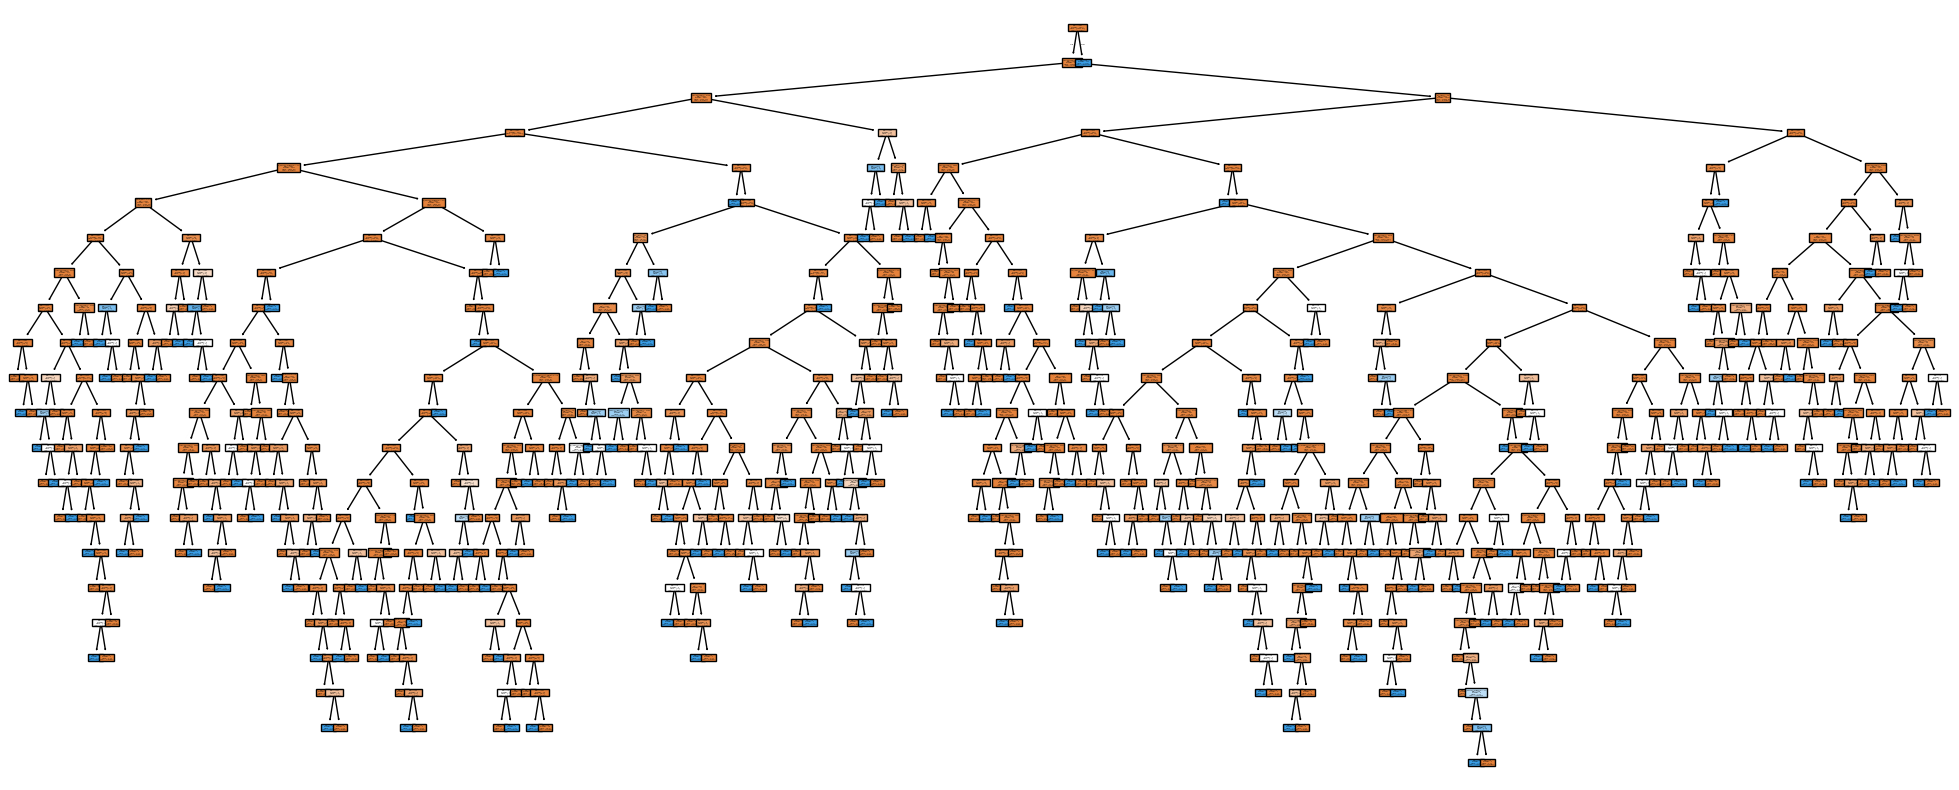

In [ ]:
plt.figure(figsize=(25, 10))
plot_tree(clf_dt,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=X.columns);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

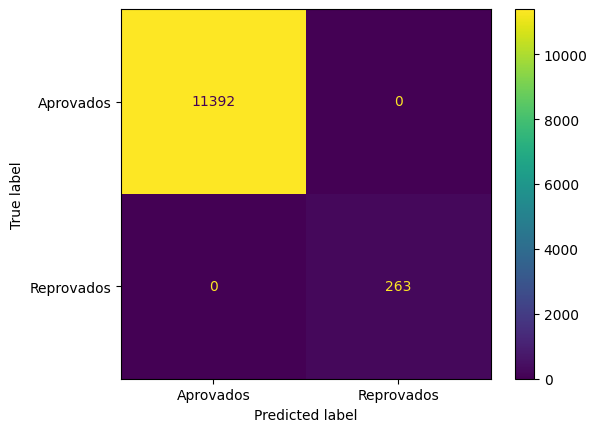

In [ ]:
y_predict_train = clf.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
CMD = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
CMD.plot()

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [ ]:
clf = DecisionTreeClassifier(random_state=100)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [ ]:
y_test_all_bons = np.ones_like(y_test)
accuracy_all_bons = accuracy_score(y_test, y_test_all_bons)
print(f'Acurácia se todas as previsões fossem "bons": {accuracy_all_bons:.2f}')

Acurácia se todas as previsões fossem "bons": 0.03


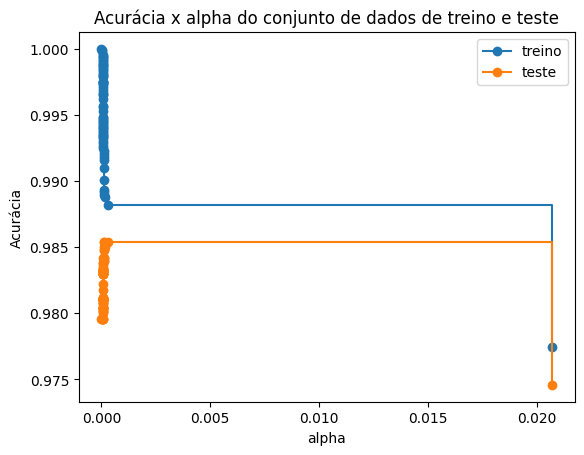

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [ ]:
pd.DataFrame({'alpha': ccp_alphas.tolist(), 'score': test_scores})

,alpha,score
0,0.000000,0.979580
1,0.000042,0.979580
2,0.000043,0.979580
3,0.000049,0.979580
4,0.000053,0.979580
...,...,...
65,0.000117,0.985385
66,0.000129,0.984985
67,0.000168,0.984985
68,0.000281,0.985385


In [ ]:
clf_podada = DecisionTreeClassifier(random_state=100, ccp_alpha=0.022588)

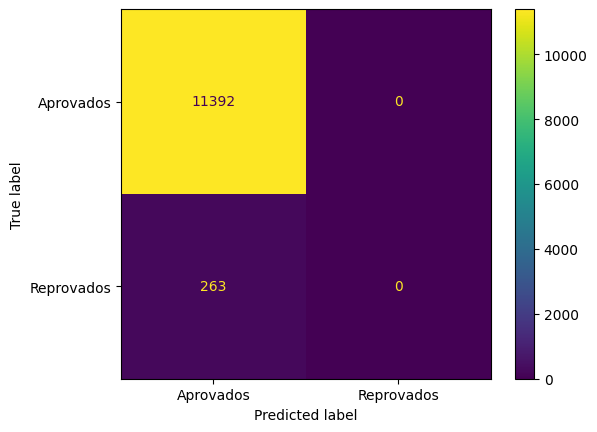

In [ ]:
y_predict_train = clf_podada.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
CMD = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
CMD.plot()

In [ ]:
pred = clf_podada.predict(X_test)

In [ ]:
accuracy_score(y_test, pred)

0.9745745745745745

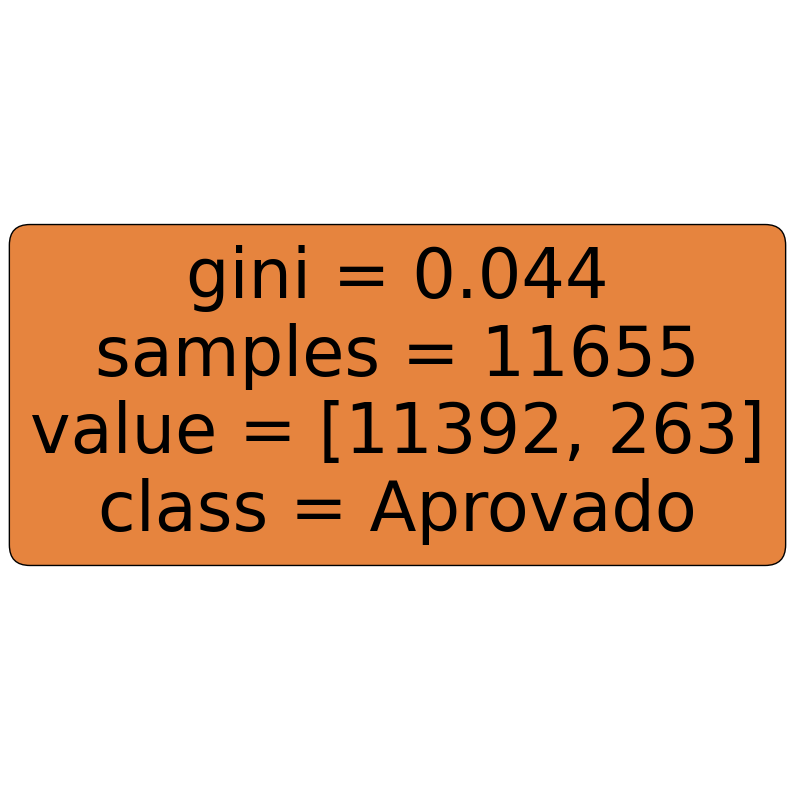

In [ ]:
plt.figure(figsize=[10,10])
plot_tree(clf_podada,
         filled=True,
         rounded=True,
         class_names=['Aprovado', 'Reprovado'],
         feature_names=X_train.columns);

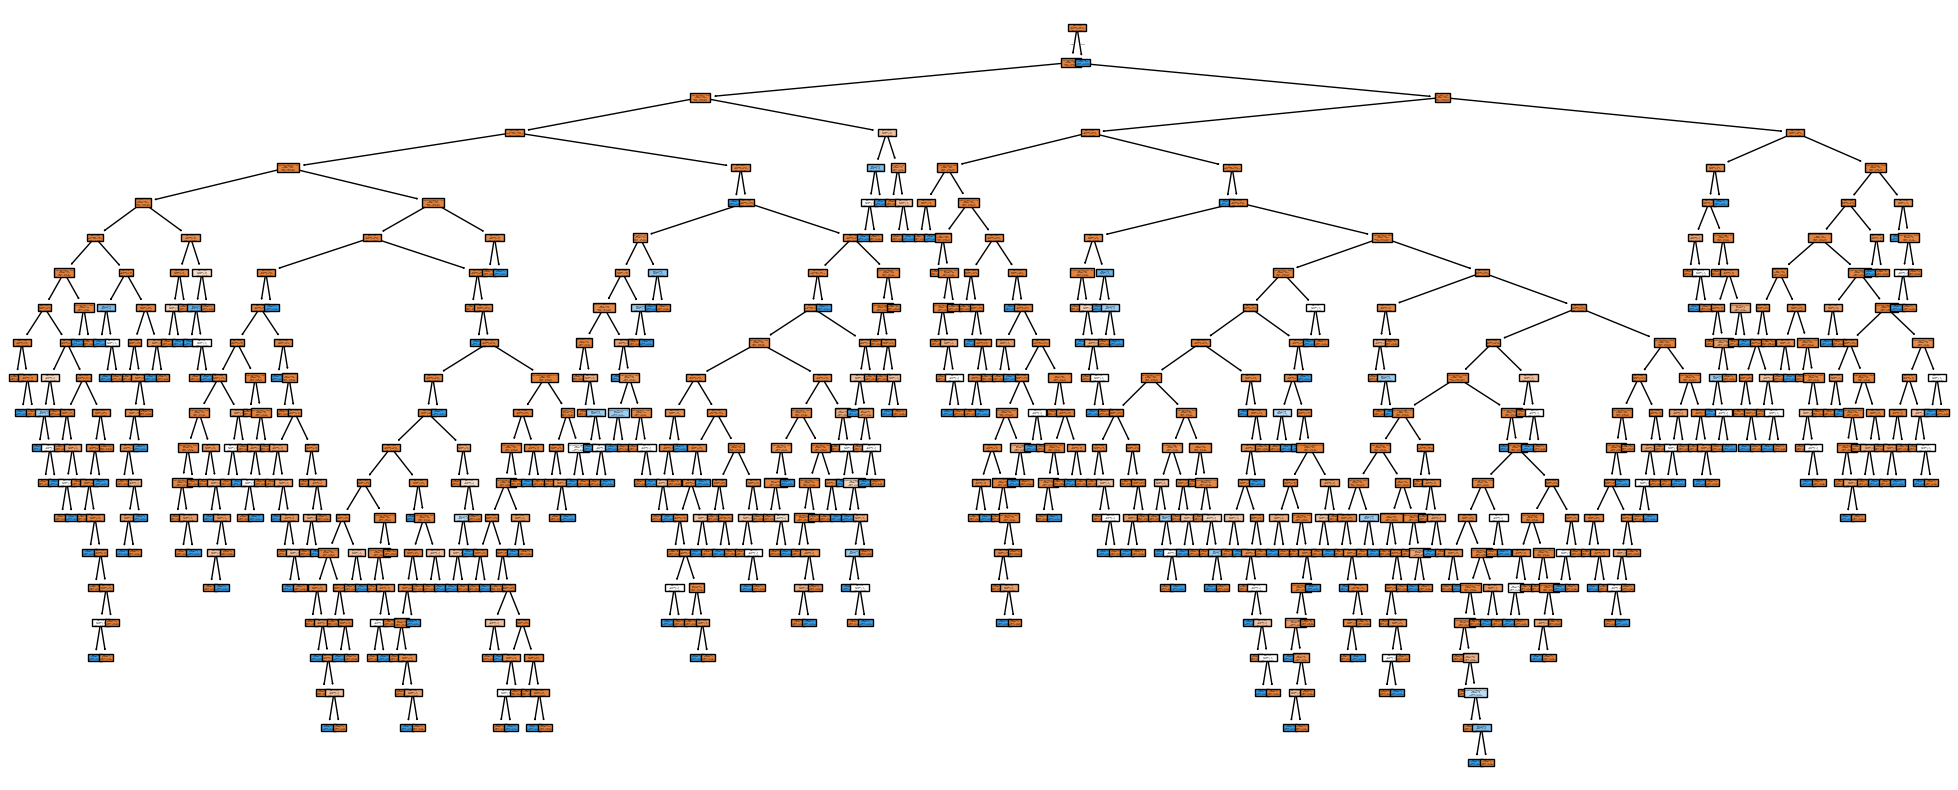

In [ ]:
plt.figure(figsize=(25, 10))
plot_tree(clf_dt,
          filled=True,
          class_names=['Aprovado', 'Reprovado'],
          feature_names=X.columns);